In [2]:
import numpy as np
import matplotlib.pyplot as plt
X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)
plt.scatter(X,y)
X

array([[1.87087034],
       [1.75864595],
       [0.62090341],
       [0.63565248],
       [1.4230717 ],
       [1.54777926],
       [1.63922618],
       [0.7903657 ],
       [0.15119152],
       [0.40475172],
       [0.18642462],
       [1.89203015],
       [0.14662466],
       [0.99500889],
       [0.07892837],
       [0.38420111],
       [0.33812509],
       [0.00676679],
       [0.32619566],
       [0.53238023],
       [0.95574491],
       [0.86927847],
       [0.822356  ],
       [0.7878788 ],
       [0.81373977],
       [0.42133085],
       [0.23308463],
       [1.7519382 ],
       [0.96990269],
       [1.84188634],
       [1.73462244],
       [1.00878883],
       [1.34370869],
       [0.38270171],
       [1.63725862],
       [0.89424414],
       [0.50859979],
       [0.76277224],
       [1.05411173],
       [1.94500798],
       [1.59034151],
       [1.98739744],
       [1.16112516],
       [0.88106853],
       [0.21048107],
       [1.20342307],
       [1.27554547],
       [1.293

In [3]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
X_b

array([[1.        , 1.87087034],
       [1.        , 1.75864595],
       [1.        , 0.62090341],
       [1.        , 0.63565248],
       [1.        , 1.4230717 ],
       [1.        , 1.54777926],
       [1.        , 1.63922618],
       [1.        , 0.7903657 ],
       [1.        , 0.15119152],
       [1.        , 0.40475172],
       [1.        , 0.18642462],
       [1.        , 1.89203015],
       [1.        , 0.14662466],
       [1.        , 0.99500889],
       [1.        , 0.07892837],
       [1.        , 0.38420111],
       [1.        , 0.33812509],
       [1.        , 0.00676679],
       [1.        , 0.32619566],
       [1.        , 0.53238023],
       [1.        , 0.95574491],
       [1.        , 0.86927847],
       [1.        , 0.822356  ],
       [1.        , 0.7878788 ],
       [1.        , 0.81373977],
       [1.        , 0.42133085],
       [1.        , 0.23308463],
       [1.        , 1.7519382 ],
       [1.        , 0.96990269],
       [1.        , 1.84188634],
       [1.

In [4]:
theta_best

array([[3.93271462],
       [3.02104766]])

In [5]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict
X_new

array([[0],
       [2]])

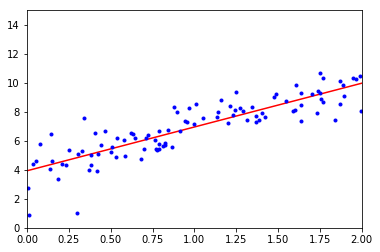

In [6]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X,y, "b.")
plt.axis([0,2,0,15])
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)

array([[3.93271462],
       [9.97480994]])

In [8]:
eta = 0.1
n_iterations = 100000
m =100
theta = np.random.randn(2,1)
for iteration in range(n_iterations):
    if(gradients.all() >0.001):
        gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
        theta = theta - eta*gradients
    else: break


NameError: name 'gradients' is not defined

In [ ]:
theta

In [ ]:
n_epochs = 10
t0 ,t1 = 5,50
def learning_schedule(t):
    return t0 / (t+t1)
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta* gradients
        
        
        
        
        

In [ ]:
theta

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter = 50, penalty = None, eta0 = 0.1)
sgd_reg.fit(X,y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

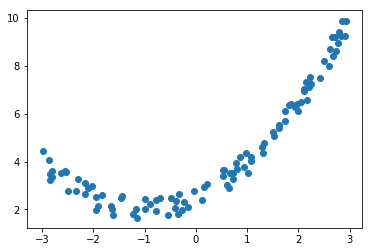

In [67]:
m =100
X = 6* np.random.rand(m,1)-3
y = 0.5*X**2 + X+2 + np.random.rand(m,1)
plt.scatter(X,y)

In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree =2 , include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([1.87087034])

In [15]:
X_poly[0]

array([1.87087034, 3.50015583])

In [68]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.58348277]), array([[ 1.47187457, -0.42303465]]))

In [69]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curve(model,X,y):
    X_train,X_val , y_train, y_val = train_test_split(X,y,test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val[:m])
        train_errors.append(mean_squared_error(y_train_predict,y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict,y_val[:m]))
    
    plt.plot(np.sqrt(train_errors),"r-+", linewidth = 2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth =3, label= "val" )


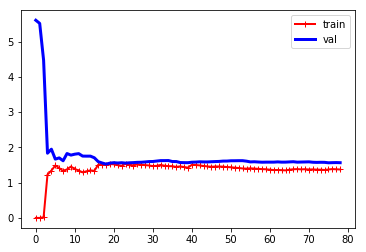

In [70]:
lin_reg = LinearRegression()
plot_learning_curve(lin_reg,X,y)
plt.legend(loc='upper right')

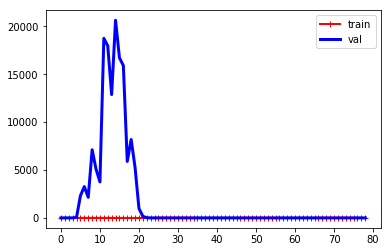

In [71]:
from sklearn.pipeline import Pipeline
polynomial_regression= Pipeline((("poly_features ", PolynomialFeatures(degree=10, include_bias =False)), ("sgd_reg",LinearRegression()),))
plot_learning_curve(polynomial_regression,X,y)
plt.legend(loc='upper right')

In [72]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
ridge_reg = Ridge(alpha=1, solver = "cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.77879535]])

In [73]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

C:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([4.90328412])

In [74]:
sgd_reg =SGDRegressor(penalty="l1")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

C:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([4.89393538])

In [75]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha =0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([5.74475479])

In [93]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())
X=iris["data"][:,3:]
y= (iris["target"]==2).astype(np.int)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [94]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [101]:
X_new = np.linspace(0,3,1000).reshape(-1,1)


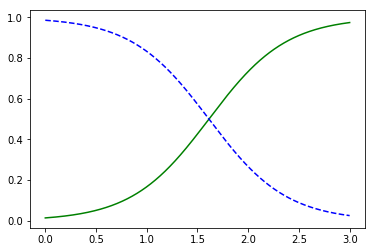

In [102]:
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

In [106]:
X=iris["data"][:,(2,3)]
y= iris["target"]
softmax_reg = LogisticRegression(multi_class = "multinomial", solver = "lbfgs", C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [107]:
softmax_reg.predict([[5, 2]])

array([2])

In [108]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])